# Quadeer Shaikh M.Tech AI Roll: 006

In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

### Independent Variables Shape

In [3]:
train_data.shape

(404, 13)

### Dependent Variables Shape

In [5]:
train_targets.shape

(404,)

### Standardizing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
train_data_sc = scaler.fit_transform(train_data)
test_data_sc = scaler.transform(test_data)

### Model 

In [9]:
def build_model(layers,n,lr=0.001):
    model = Sequential()
    model.add(Dense(layers[0], activation='relu',input_shape=(n,)))
    for nlayer in layers[1:]:
        model.add(Dense(nlayer,activation='relu'))
    model.add(Dense(1))
              
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(lr),
        loss=tf.keras.losses.mean_squared_error,
        metrics=['mean_absolute_error']
    )
    return model

### 3 layer NN (train and test split only)

In [10]:
layers = [64,32]
n = train_data.shape[1]
model = build_model(layers,n)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size = 32

history = model.fit(
                train_data_sc,
                train_targets,
                batch_size = batch_size,
                epochs=50,
                steps_per_epoch=train_data_sc.shape[0]//batch_size,
                validation_batch_size=batch_size,
                validation_data=(test_data_sc,test_targets),
                validation_steps = test_data_sc.shape[0]//batch_size,
                verbose=1
            )

Epoch 1/50
12/12 [==============================] - 1s 64ms/step - loss: 554.0378 - mean_absolute_error: 21.6231 - val_loss: 502.1891 - val_mean_absolute_error: 20.5222
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 532.1625 - mean_absolute_error: 20.6462 - val_loss: 434.5531 - val_mean_absolute_error: 18.8226
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 405.3128 - mean_absolute_error: 17.9055 - val_loss: 360.6814 - val_mean_absolute_error: 16.9230
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 346.4327 - mean_absolute_error: 16.1447 - val_loss: 286.4572 - val_mean_absolute_error: 14.8954
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 295.9249 - mean_absolute_error: 14.7831 - val_loss: 212.2682 - val_mean_absolute_error: 12.6669
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 197.1682 - mean_absolute_error: 11.8372 - val_loss: 155.0996 - val_mean_absolute_error

### Train and Validation Loss

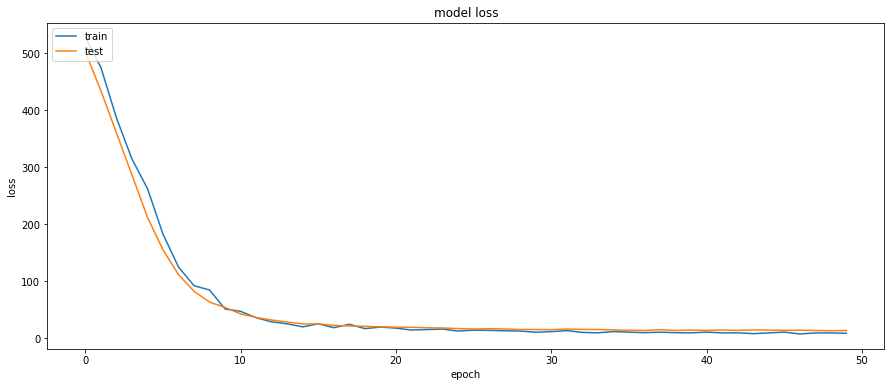

In [13]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Test evaluation

In [15]:
y_pred = model.predict(test_data_sc)
print("RMSE: ",mean_squared_error(test_targets,y_pred,squared=False))
print("MAE: ",mean_absolute_error(test_targets,y_pred))
print("R Squared: ",r2_score(test_targets,y_pred))

RMSE:  4.646562739509003
MAE:  3.0370813734391158
R Squared:  0.740634945691417


In [16]:
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

kf = KFold(n_splits=5) 

In [17]:
data = np.vstack([train_data,test_data])
targets = np.hstack([train_targets,test_targets])

### 5 - Fold Cross Validation

In [18]:
scaler = StandardScaler()
performance = []
models = []

for fold, (train,val) in enumerate(kf.split(X=data,y=targets)):
    print(f"Training fold: {fold+1}")

    X_train = data[train,:]
    y_train = targets[train]
    
    X_val = data[val,:]
    y_val = targets[val]
    
    X_train_sc = scaler.fit_transform(X_train)
    X_val_sc = scaler.transform(X_val)
    
    layers = [64,32]
    n = X_train.shape[1]
    model = build_model(layers,n)
    
    batch_size = 24

    history = model.fit(
                    X_train_sc,
                    y_train,
                    batch_size = batch_size,
                    epochs=300,
                    steps_per_epoch=X_train_sc.shape[0]//batch_size,
                    validation_batch_size=batch_size,
                    validation_data=(X_val_sc,y_val),
                    validation_steps = X_val_sc.shape[0]//batch_size,
                    verbose=0
                )
    
    performance.append(history)
    models.append(model)
    
    y_pred = model.predict(X_val_sc)
    print("RMSE: ",mean_squared_error(y_val,y_pred,squared=False))
    print("MAE: ",mean_absolute_error(y_val,y_pred))
    print("R Squared: ",r2_score(y_val,y_pred))
    print("---------------------------------------")

Training fold: 1
RMSE:  2.677252325047286
MAE:  1.9075458031074675
R Squared:  0.9277204086524247
---------------------------------------
Training fold: 2
RMSE:  2.950617647253762
MAE:  2.167612860462453
R Squared:  0.8718403494001027
---------------------------------------
Training fold: 3
RMSE:  3.6551590442738373
MAE:  2.4843812489273525
R Squared:  0.7994118640802168
---------------------------------------
Training fold: 4
RMSE:  3.12683187474574
MAE:  2.399462652678537
R Squared:  0.904502614381157
---------------------------------------
Training fold: 5
RMSE:  3.6737496507520784
MAE:  2.412011234358986
R Squared:  0.8344950909013346
---------------------------------------


### Averaging loss of each epoch across 5 - fold models

In [19]:
avg_train_loss = []
avg_val_loss = []

for i in range(len(performance)):
    avg_train_loss.append(performance[i].history['loss'])
    avg_val_loss.append(performance[i].history['val_loss'])
    
avg_train_loss = np.array(avg_train_loss).mean(axis=0)
avg_val_loss = np.array(avg_val_loss).mean(axis=0)

In [1]:
plt.figure(figsize=(15,6))
plt.plot(avg_train_loss)
plt.plot(avg_val_loss)
plt.title('Average Model Loss across 5 Folds')
plt.ylabel('Average Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

### Initializing a new model with best parameters
- Model trained on the first fold had the best parameters based on RMSE, MAE and R Squared values

In [21]:
weights = models[0].get_weights()

In [22]:
layers = [64,32]
n = X_train.shape[1]
fresh_model = build_model(layers,n)

In [23]:
fresh_model.set_weights(weights)

In [24]:
history = fresh_model.fit(
                train_data_sc,
                train_targets,
                batch_size = batch_size,
                epochs=300,
                steps_per_epoch=train_data_sc.shape[0]//batch_size,
                validation_batch_size=batch_size,
                validation_data=(test_data_sc,test_targets),
                validation_steps = test_data_sc.shape[0]//batch_size,
                verbose=1
            )

Epoch 1/300
16/16 [==============================] - 1s 11ms/step - loss: 5.0977 - mean_absolute_error: 1.6196 - val_loss: 3.4382 - val_mean_absolute_error: 1.3641
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 4.4038 - mean_absolute_error: 1.4870 - val_loss: 3.6981 - val_mean_absolute_error: 1.4031
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 5.1981 - mean_absolute_error: 1.4726 - val_loss: 3.6569 - val_mean_absolute_error: 1.4253
Epoch 4/300
16/16 [==============================] - 0s 3ms/step - loss: 5.8432 - mean_absolute_error: 1.7211 - val_loss: 4.3993 - val_mean_absolute_error: 1.6008
Epoch 5/300
16/16 [==============================] - 0s 3ms/step - loss: 3.7309 - mean_absolute_error: 1.4157 - val_loss: 3.7008 - val_mean_absolute_error: 1.4373
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 4.3061 - mean_absolute_error: 1.4448 - val_loss: 3.8434 - val_mean_absolute_error: 1.4723
Epoch 7/300
16/16 [==

16/16 [==============================] - 0s 2ms/step - loss: 3.9522 - mean_absolute_error: 1.3739 - val_loss: 5.4431 - val_mean_absolute_error: 1.8340
Epoch 52/300
16/16 [==============================] - 0s 3ms/step - loss: 3.5145 - mean_absolute_error: 1.3459 - val_loss: 5.2693 - val_mean_absolute_error: 1.7666
Epoch 53/300
16/16 [==============================] - 0s 4ms/step - loss: 2.7273 - mean_absolute_error: 1.1530 - val_loss: 5.4894 - val_mean_absolute_error: 1.8241
Epoch 54/300
16/16 [==============================] - 0s 7ms/step - loss: 2.6857 - mean_absolute_error: 1.2167 - val_loss: 4.8759 - val_mean_absolute_error: 1.6838
Epoch 55/300
16/16 [==============================] - 0s 2ms/step - loss: 2.6836 - mean_absolute_error: 1.2138 - val_loss: 5.2895 - val_mean_absolute_error: 1.7618
Epoch 56/300
16/16 [==============================] - 0s 3ms/step - loss: 4.0935 - mean_absolute_error: 1.4139 - val_loss: 5.0542 - val_mean_absolute_error: 1.7178
Epoch 57/300
16/16 [=========

16/16 [==============================] - 0s 4ms/step - loss: 2.7783 - mean_absolute_error: 1.2019 - val_loss: 5.1619 - val_mean_absolute_error: 1.7684
Epoch 102/300
16/16 [==============================] - 0s 4ms/step - loss: 2.3825 - mean_absolute_error: 1.1548 - val_loss: 5.3688 - val_mean_absolute_error: 1.7863
Epoch 103/300
16/16 [==============================] - 0s 4ms/step - loss: 2.4466 - mean_absolute_error: 1.1458 - val_loss: 5.9270 - val_mean_absolute_error: 1.8862
Epoch 104/300
16/16 [==============================] - 0s 4ms/step - loss: 2.5451 - mean_absolute_error: 1.1673 - val_loss: 5.5430 - val_mean_absolute_error: 1.8481
Epoch 105/300
16/16 [==============================] - 0s 4ms/step - loss: 3.7022 - mean_absolute_error: 1.3044 - val_loss: 5.6066 - val_mean_absolute_error: 1.8290
Epoch 106/300
16/16 [==============================] - 0s 3ms/step - loss: 2.4850 - mean_absolute_error: 1.1704 - val_loss: 5.0906 - val_mean_absolute_error: 1.7694
Epoch 107/300
16/16 [===

Epoch 151/300
16/16 [==============================] - 0s 4ms/step - loss: 2.4457 - mean_absolute_error: 1.1192 - val_loss: 5.6067 - val_mean_absolute_error: 1.8174
Epoch 152/300
16/16 [==============================] - 0s 4ms/step - loss: 1.8825 - mean_absolute_error: 1.0128 - val_loss: 5.8756 - val_mean_absolute_error: 1.8848
Epoch 153/300
16/16 [==============================] - 0s 4ms/step - loss: 2.1731 - mean_absolute_error: 1.0667 - val_loss: 6.3412 - val_mean_absolute_error: 2.0288
Epoch 154/300
16/16 [==============================] - 0s 3ms/step - loss: 1.6849 - mean_absolute_error: 0.9424 - val_loss: 5.5946 - val_mean_absolute_error: 1.8346
Epoch 155/300
16/16 [==============================] - 0s 4ms/step - loss: 2.0679 - mean_absolute_error: 1.0595 - val_loss: 5.2095 - val_mean_absolute_error: 1.7648
Epoch 156/300
16/16 [==============================] - 0s 3ms/step - loss: 1.5130 - mean_absolute_error: 0.9221 - val_loss: 5.6714 - val_mean_absolute_error: 1.8805
Epoch 157/

Epoch 201/300
16/16 [==============================] - 0s 3ms/step - loss: 1.5950 - mean_absolute_error: 0.9224 - val_loss: 5.7392 - val_mean_absolute_error: 1.8835
Epoch 202/300
16/16 [==============================] - 0s 4ms/step - loss: 1.8973 - mean_absolute_error: 1.0138 - val_loss: 5.6346 - val_mean_absolute_error: 1.8370
Epoch 203/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7810 - mean_absolute_error: 0.9743 - val_loss: 6.7917 - val_mean_absolute_error: 2.0365
Epoch 204/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7224 - mean_absolute_error: 0.9607 - val_loss: 5.3570 - val_mean_absolute_error: 1.7910
Epoch 205/300
16/16 [==============================] - 0s 4ms/step - loss: 1.6833 - mean_absolute_error: 0.9276 - val_loss: 5.6029 - val_mean_absolute_error: 1.8849
Epoch 206/300
16/16 [==============================] - 0s 3ms/step - loss: 1.4736 - mean_absolute_error: 0.8853 - val_loss: 5.3700 - val_mean_absolute_error: 1.7956
Epoch 207/

Epoch 251/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7519 - mean_absolute_error: 0.9932 - val_loss: 6.0127 - val_mean_absolute_error: 1.9627
Epoch 252/300
16/16 [==============================] - 0s 4ms/step - loss: 1.4902 - mean_absolute_error: 0.8648 - val_loss: 5.8966 - val_mean_absolute_error: 1.9197
Epoch 253/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7065 - mean_absolute_error: 0.9194 - val_loss: 6.2126 - val_mean_absolute_error: 1.9722
Epoch 254/300
16/16 [==============================] - 0s 3ms/step - loss: 1.2958 - mean_absolute_error: 0.8449 - val_loss: 6.1403 - val_mean_absolute_error: 1.9483
Epoch 255/300
16/16 [==============================] - 0s 4ms/step - loss: 1.3322 - mean_absolute_error: 0.8168 - val_loss: 6.3141 - val_mean_absolute_error: 2.0052
Epoch 256/300
16/16 [==============================] - 0s 3ms/step - loss: 1.6539 - mean_absolute_error: 0.9177 - val_loss: 6.2313 - val_mean_absolute_error: 1.9730
Epoch 257/

In [25]:
y_pred = fresh_model.predict(test_data_sc)

### Test Evaluation

In [26]:
print("RMSE: ",mean_squared_error(test_targets,y_pred,squared=False))
print("MAE: ",mean_absolute_error(test_targets,y_pred))
print("R Squared: ",r2_score(test_targets,y_pred))

RMSE:  2.6128611832004207
MAE:  2.0750934180091414
R Squared:  0.917987410672734


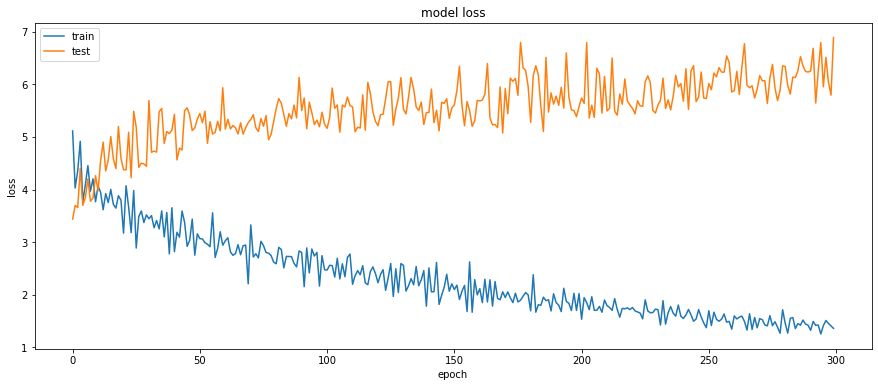

In [27]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()